In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

In [23]:
df=pd.read_csv('Flight_Fare.csv')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR-BOM-DEL,05:45,11:25,5h 40m,1 stop,Business class,79512
1,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR-BOM-DEL,05:45,12:25,6h 40m,1 stop,Business class,62427
2,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR-MAA-DEL,09:45,14:25,4h 40m,1 stop,Business class,57209
3,Jet Airways,18/03/2019,Banglore,New Delhi,BLR-BOM-DEL,18:40,00:45 16 Mar,6h 5m,1 stop,No info,54826
4,Jet Airways,18/03/2019,Banglore,New Delhi,BLR-BOM-DEL,22:50,05:05 16 Mar,6h 15m,1 stop,No info,54826


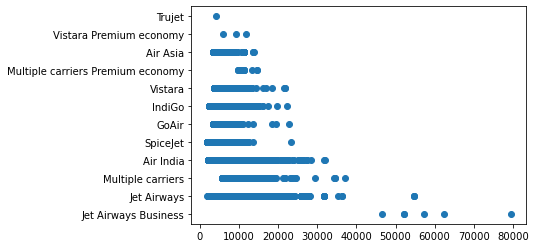

In [6]:
#Checking outliers

plt.scatter(df.Price,df.Airline)

In [7]:
# removal of outliers

df.drop(df.loc[df['Price']>40000].index, inplace=True)

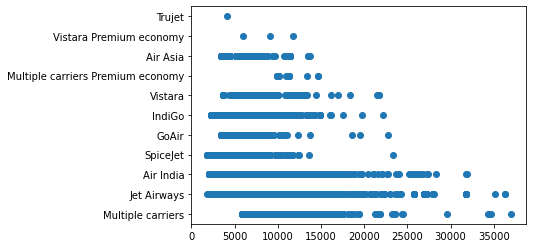

In [8]:
plt.scatter(df.Price,df.Airline)

In [9]:
# transforming Date_of_Journey column

df["Journey_DD"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day
df["Journey_MM"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.month
df["Journey_YYYY"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.year

In [10]:
# transforming Dep_Time 

df["dep_HH"] = pd.to_datetime(df.Dep_Time).dt.hour
df["dep_MM"] = pd.to_datetime(df.Dep_Time).dt.minute

In [11]:
# transforming Total_Stops 

df["Total_Stops"] = df['Total_Stops'].replace('non-stop','0')
df["Total_Stops"] = df['Total_Stops'].replace('1 stop','1')
df["Total_Stops"] = df['Total_Stops'].replace('2 stops','2')
df["Total_Stops"] = df['Total_Stops'].replace('3 stops','3')
df["Total_Stops"] = df['Total_Stops'].replace('4 stops','4')
df['Total_Stops'] = df['Total_Stops'].fillna(1)
df["Total_Stops"] = df['Total_Stops'].astype(int)

In [12]:
# transforming Duration
df['Duration']=  df['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [13]:
ddf=df.loc[:,['Airline','Source','Destination','Duration','Total_Stops','Additional_Info','Journey_DD','Journey_MM','Journey_YYYY','dep_HH','dep_MM','Price']]

In [14]:
# transformed data

ddf.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Journey_DD,Journey_MM,Journey_YYYY,dep_HH,dep_MM,Price
9,Multiple carriers,Delhi,Cochin,385,1,No info,1,3,2019,12,50,36983
10,Jet Airways,Banglore,New Delhi,305,1,No info,1,3,2019,14,5,36235


In [15]:
# label encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
ddf.Airline= le.fit_transform(ddf.Airline)
ddf.Source= le.fit_transform(ddf.Source)
ddf.Destination= le.fit_transform(ddf.Destination)
ddf.Additional_Info= le.fit_transform(ddf.Additional_Info)

In [22]:
ddf.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Journey_DD,Journey_MM,Journey_YYYY,dep_HH,dep_MM,Price
9,5,2,1,385,1,8,1,3,2019,12,50,36983
10,4,0,5,305,1,8,1,3,2019,14,5,36235
11,4,0,5,435,1,8,1,3,2019,14,5,36235
12,4,0,5,365,1,8,1,3,2019,18,40,35185
13,5,2,1,630,2,8,9,3,2019,15,5,34608


In [17]:
# X and y split 

X=ddf.loc[:,['Airline','Source','Destination','Duration','Total_Stops','Additional_Info','Journey_DD','Journey_MM','Journey_YYYY','dep_HH','dep_MM']]
y=ddf.Price

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.20,random_state=55)

In [19]:
# initialising xgboost

from xgboost import XGBRegressor

model = XGBRegressor()

model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [20]:
y_predict = model.predict(X_test)

In [21]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

0.915761848319933

In [50]:
# input arguments for independent prediction

d2 = pd.DataFrame (
    {
        'Airline':[5],
        'Source':[2],
        'Destination':[1],
        'Duration':[405],
        'Total_Stops':[1],
        'Additional_Info':[8],
        'Journey_DD':[1],
        'Journey_MM':[3],
        'Journey_YYYY':[2019],
        'dep_HH':[12],
        'dep_MM':[50]
    }
)
d2

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Journey_DD,Journey_MM,Journey_YYYY,dep_HH,dep_MM
0,5,2,1,405,1,8,1,3,2019,12,50


In [56]:
y_predict = model.predict(d2)

In [57]:
print(y_predict)

[27604.465]


## trying LinearRegression

In [58]:
# initialising LinearRegression

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [60]:
y_predict = model.predict(X_test)

In [61]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

0.4522822021813271

In [65]:
from sklearn.svm import SVC
model = SVC(kernel='rbf', C=1, gamma=0.05) # tuning hyper parameter
model.fit(X_train, y_train)

SVC(C=1, gamma=0.05)

In [66]:
y_predict = model.predict(X_test)

In [67]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.2234192037470726

In [ ]:
# Summary: We found the XGBoost model performing better prediction than the LinearRegression in this case.
#     we tried multiple iterations with different hyperparameters and achieved 91% accuracy in XGBoost - After removing outliers.